In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np


In [21]:
#Defining Oracle of the circuit

oracle = QuantumCircuit(2,name ='oracle')
oracle.cx(1,0)
oracle.cz(0,1)
oracle.cx(1,0)
oracle.to_gate()
oracle.draw()

┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     └─┬─┘ │ └─┬─┘
q_1: ──■───■───■──

In [25]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1]) #Creating super postion of inputs as |00> |01> |10> and |11>
grover_circ.append(oracle,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [26]:
job = execute(grover_circ,backend)
result = job.result()


In [27]:
sv = result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j])

In [28]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

reflection = QuantumCircuit(2, name ='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

In [29]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [33]:
backend = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(2,2)
qc.append(oracle,[0,1])
qc.append(reflection,[0,1])
qc.measure([0,1],[0,1])

In [31]:
qc.draw()

┌─────────┐┌─────────────┐┌─┐   
q_0: ┤0        ├┤0            ├┤M├───
     │  oracle ││  reflection │└╥┘┌─┐
q_1: ┤1        ├┤1            ├─╫─┤M├
     └─────────┘└─────────────┘ ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

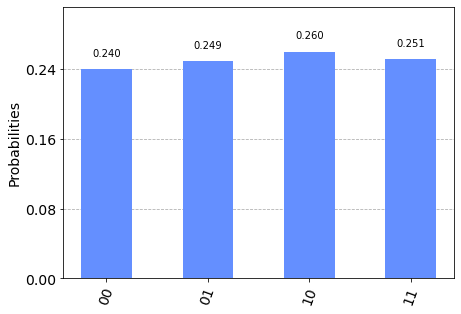

In [32]:
job = execute(qc,backend,shots =1024)
result = job.result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)